# Contents

    01. Importing libraries and data
    02. Addressing PII
    03. Regional segmentation of data
    04. Addressing low-activity customers
    05. Creating profiling variables
        a. Age Profile
        b. Income Profile
        c. Pet Owners
        d. Single Caretakers
    06. Distribution of Customer Profiles
        a. Age Group Distribution Bar Chart
        b. Income Group Distribution Pie Chart
        c. Pet Owners Distribution Pie Chart
        d. Single Caretakers Distribution Pie Chart
    07. Profile Aggregations
        a. Age Profile
        b. Income Profile
        c. Pet Owners
        d. Single Caretakers
    08. Exporting Visualizations

# 01. Importing libraries and data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#import data
path = r'C:\Users\Admin\Documents\Data Analytics Course\Achievement 4\08-2020 Instacart Basket Analysis'
ords_prods_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers.pkl'))
depts = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col=False)

In [3]:
ords_prods_customers.head()

,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,surname,gender,state,age,date_joined,no_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [4]:
ords_prods_customers['frequency_flag'].value_counts()

Frequent customer        21559853
Regular customer          7208564
Non-frequent customer     3636437
Name: frequency_flag, dtype: int64

In [5]:
ords_prods_customers.describe()

,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,mean_order,median_since_prior_order,age,no_of_dependants,income
count,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,30328763.0,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.239973e+07,3.240486e+07,3.240486e+07,32404854.0,3.240486e+07,3.240486e+07,3.240486e+07
mean,1.710745e+06,1.714230e+01,2.738867e+00,1.342515e+01,NaN,2.559866e+04,8.352547e+00,5.895873e-01,6.449111e+01,9.919792e+00,7.790994e+00,3.305217e+01,7.218542e+00,NaN,4.946527e+01,1.501896e+00,9.943773e+04
std,9.872988e+05,1.753532e+01,2.090077e+00,4.246380e+00,0.0,1.408400e+04,7.127071e+00,4.919087e-01,4.843815e+01,6.281485e+00,4.241809e+00,2.515525e+01,8.977324e-01,0.0,1.848558e+01,1.118865e+00,4.305727e+04
min,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.0,1.000000e+00,1.000000e+00,0.000000e+00,-1.280000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.559470e+05,5.000000e+00,1.000000e+00,1.000000e+01,5.0,1.354400e+04,3.000000e+00,0.000000e+00,2.400000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.378489e+00,6.0,3.300000e+01,1.000000e+00,6.700400e+04
50%,1.711049e+06,1.100000e+01,3.000000e+00,1.300000e+01,8.0,2.530200e+04,6.000000e+00,1.000000e+00,7.900000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.811940e+00,8.0,4.900000e+01,2.000000e+00,9.661800e+04
75%,2.565499e+06,2.400000e+01,5.000000e+00,1.600000e+01,15.0,3.794700e+04,1.100000e+01,1.000000e+00,1.000000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.229327e+00,13.0,6.500000e+01,3.000000e+00,1.279120e+05
max,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,30.0,4.968800e+04,1.450000e+02,1.000000e+00,1.270000e+02,2.100000e+01,2.500000e+01,9.900000e+01,2.320000e+01,30.0,8.100000e+01,3.000000e+00,5.939010e+05


In [6]:
ords_prods_customers.shape

(32404859, 33)

In [7]:
ords_prods_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   order_id                  int32   
 1   customer_id               object  
 2   order_number              int8    
 3   orders_day_of_week        int8    
 4   order_hour_of_day         int8    
 5   days_since_prior_order    float16 
 6   new_customer              bool    
 7   product_id                int32   
 8   add_to_cart_order         int32   
 9   reordered                 int8    
 10  _merge                    category
 11  product_name              object  
 12  aisle_id                  int8    
 13  department_id             int8    
 14  prices                    float64 
 15  price_label               object  
 16  busiest_days              object  
 17  busiest_period_of_day     object  
 18  max_order                 int8    
 19  loyalty_flag              object  
 20  

In [8]:
depts.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [9]:
#renaming unnamed column to 'department_id'
depts.rename(columns={'Unnamed: 0':'department_id'}, inplace=True)

In [10]:
depts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [11]:
#changing department_id data type to save memory
depts['department_id']=depts['department_id'].astype('int8')

In [12]:
#merging ords_prods_customers df and departments df 
merged_df = ords_prods_customers.merge(depts, on='department_id')

In [13]:
merged_df.head()

,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,first_name,surname,gender,state,age,date_joined,no_of_dependants,marital_status,income,department
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,beverages
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,beverages
2,473747,1,3,3,12,21.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,beverages
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,beverages
4,431534,1,5,4,15,28.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,beverages


In [14]:
merged_df.describe()

,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,mean_order,median_since_prior_order,age,no_of_dependants,income
count,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,30328763.0,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.239973e+07,3.240486e+07,3.240486e+07,32404854.0,3.240486e+07,3.240486e+07,3.240486e+07
mean,1.710745e+06,1.714230e+01,2.738867e+00,1.342515e+01,NaN,2.559866e+04,8.352547e+00,5.895873e-01,6.449111e+01,9.919792e+00,7.790994e+00,3.305217e+01,7.233186e+00,NaN,4.946527e+01,1.501896e+00,9.943773e+04
std,9.872988e+05,1.753532e+01,2.090077e+00,4.246380e+00,0.0,1.408400e+04,7.127071e+00,4.919087e-01,4.843815e+01,6.281485e+00,4.241809e+00,2.515525e+01,8.833877e-01,0.0,1.848558e+01,1.118865e+00,4.305727e+04
min,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.0,1.000000e+00,1.000000e+00,0.000000e+00,-1.280000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.559470e+05,5.000000e+00,1.000000e+00,1.000000e+01,5.0,1.354400e+04,3.000000e+00,0.000000e+00,2.400000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.378489e+00,6.0,3.300000e+01,1.000000e+00,6.700400e+04
50%,1.711049e+06,1.100000e+01,3.000000e+00,1.300000e+01,8.0,2.530200e+04,6.000000e+00,1.000000e+00,7.900000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.811940e+00,8.0,4.900000e+01,2.000000e+00,9.661800e+04
75%,2.565499e+06,2.400000e+01,5.000000e+00,1.600000e+01,15.0,3.794700e+04,1.100000e+01,1.000000e+00,1.000000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.229327e+00,13.0,6.500000e+01,3.000000e+00,1.279120e+05
max,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,30.0,4.968800e+04,1.450000e+02,1.000000e+00,1.270000e+02,2.100000e+01,2.500000e+01,9.900000e+01,2.320000e+01,30.0,8.100000e+01,3.000000e+00,5.939010e+05


In [15]:
merged_df.shape

(32404859, 34)

In [16]:
#deleting ords_prods_customers df to save memory
del ords_prods_customers

# 02. Addressing PII

In [17]:
#removing first_name and surname columns to protect PII 
merged_df=merged_df.drop(columns=['first_name', 'surname'])

In [18]:
merged_df.dtypes

order_id                       int32
customer_id                   object
order_number                    int8
orders_day_of_week              int8
order_hour_of_day               int8
days_since_prior_order       float16
new_customer                    bool
product_id                     int32
add_to_cart_order              int32
reordered                       int8
_merge                      category
product_name                  object
aisle_id                        int8
department_id                   int8
prices                       float64
price_label                   object
busiest_days                  object
busiest_period_of_day         object
max_order                       int8
loyalty_flag                  object
mean_order                   float32
spending_flag                 object
median_since_prior_order     float16
frequency_flag                object
gender                        object
state                         object
age                             int8
d

# 03. Regional segmentation of data

In [19]:
#creating list of regions 
northeast=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
midwest=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
south=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky', 'Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
west=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [20]:
#creating new columnn in ords_prods_customers df and setting it equal to the appropriate geographical areas list 
merged_df.loc[merged_df['state'].isin(northeast), 'region']='Northeast'
merged_df.loc[merged_df['state'].isin(midwest), 'region']='Midwest'
merged_df.loc[merged_df['state'].isin(south), 'region']='South'
merged_df.loc[merged_df['state'].isin(west), 'region']='West'

In [21]:
merged_df['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [22]:
#creating crosstab to determine if there are spending differences btwn regions
crosstab_region_spending = pd.crosstab(merged_df['region'], merged_df['spending_flag'], dropna = False)
crosstab_region_spending

spending_flag,High Spender,Low Spender
region,,
Midwest,29265,7568060
Northeast,18642,5704094
South,40579,10751306
West,31242,8261671


In [23]:
unique_customers_region=merged_df.groupby('region').agg({'prices':['sum'],'customer_id':['nunique'], 'mean_order':['mean']})
unique_customers_region.columns=['Total Price', 'Total Customer Count', 'Mean Price']
unique_customers_region

,Total Price,Total Customer Count,Mean Price
region,,,
Midwest,59192977.7,48519,7.792588
Northeast,44530105.8,36388,7.782410
South,84107910.4,68737,7.794921
West,64595126.7,52565,7.790355


The South has the most total customers, as well as the most total spent and the most number of high spenders. Percentage-wise, 
for each region, the total percentage of high spenders falls between 3.5% and 4%. Therefore, the South brings in more revenue due to having a larger number of customers, but the proportional breakdown of high versus low spenders is consistent throughout the regions. 

# 04. Addressing low activity customers

In [24]:
#Create an exclusion flag for low-activity customers
merged_df.loc[merged_df['max_order'] < 5, 'low_activity_flag'] = 'exclude_customer'
merged_df.loc[merged_df['max_order'] >= 5, 'low_activity_flag'] = 'keep_customer'

In [25]:
#count
merged_df['low_activity_flag'].value_counts(dropna=False)

keep_customer       30964564
exclude_customer     1440295
Name: low_activity_flag, dtype: int64

In [26]:
#creating subset dataframe excluding low activty customers
df_new = merged_df[merged_df['low_activity_flag']== 'keep_customer']

In [27]:
#checking that only customers flagged to keep remain
df_new['low_activity_flag'].value_counts(dropna=False)

keep_customer    30964564
Name: low_activity_flag, dtype: int64

In [28]:
df_new.shape

(30964564, 34)

In [27]:
df_new.head()

,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,gender,state,age,date_joined,no_of_dependants,marital_status,income,department,region,low_activity_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,keep_customer
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,keep_customer
2,473747,1,3,3,12,21.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,keep_customer
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,keep_customer
4,431534,1,5,4,15,28.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,keep_customer


In [28]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 32404855
Data columns (total 34 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   order_id                  int32   
 1   customer_id               object  
 2   order_number              int8    
 3   orders_day_of_week        int8    
 4   order_hour_of_day         int8    
 5   days_since_prior_order    float16 
 6   new_customer              bool    
 7   product_id                int32   
 8   add_to_cart_order         int32   
 9   reordered                 int8    
 10  _merge                    category
 11  product_name              object  
 12  aisle_id                  int8    
 13  department_id             int8    
 14  prices                    float64 
 15  price_label               object  
 16  busiest_days              object  
 17  busiest_period_of_day     object  
 18  max_order                 int8    
 19  loyalty_flag              object  
 20  

In [29]:
df_new['department'].unique()

array(['beverages', 'dairy eggs', 'snacks', 'household', 'produce',
       'breakfast', 'pantry', 'bakery', 'frozen', 'dry goods pasta',
       'canned goods', 'personal care', 'meat seafood', 'deli',
       'international', 'alcohol', 'missing', 'pets', 'babies', 'other',
       'bulk'], dtype=object)

In [30]:
#exporting dataframe subset with low activity customers excluded
df_new.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_cust_exclude.pkl'))

# 05. Creating profiling variables

## Age profile

In [15]:
#creating flags for customers based on age range
df_new.loc[(df_new['age']>=18)&(df_new['age']<=34), 'age_group']='early_adult'
df_new.loc[(df_new['age']>=35)&(df_new['age']<=44), 'age_group']='middle_adult'
df_new.loc[(df_new['age']>=45)&(df_new['age']<=64), 'age_group']='late_middle_adult'
df_new.loc[df_new['age']>=65, 'age_group']='older_adult'

df_new['age_group'].value_counts(dropna=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13840\1290417224.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.loc[(df_new['age']>=18)&(df_new['age']<=34), 'age_group']='early_adult'


late_middle_adult    9690051
early_adult          8242295
older_adult          8195544
middle_adult         4836674
Name: age_group, dtype: int64

## Income profile

In [16]:
#creating flags for income (based on usweekly economic article) 
df_new.loc[df_new['income']<52200, 'income_group']='low income'
df_new.loc[(52200 <= df_new['income'])&(156600 >= df_new['income']), 'income_group']='middle income'
df_new.loc[156600 < df_new['income'], 'income_group']='high income'
df_new['income_group'].value_counts(dropna=False)       

C:\Users\Admin\AppData\Local\Temp\ipykernel_13840\3019733051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.loc[df_new['income']<52200, 'income_group']='low income'


middle income    24541393
low income        3691708
high income       2731463
Name: income_group, dtype: int64

## Pet owners profile 

In [17]:
#creating a flag for customers who have bought pet supplies and those who havent
df_new['pet_owner_flag'] = ['pet owner' if x == 'pets' else 'non pet owner' for x in df_new['department']]
df_new['pet_owner_flag']=df_new.groupby(['customer_id'])['pet_owner_flag'].transform(np.max)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13840\3281156152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['pet_owner_flag'] = ['pet owner' if x == 'pets' else 'non pet owner' for x in df_new['department']]
C:\Users\Admin\AppData\Local\Temp\ipykernel_13840\3281156152.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['pet_owner_flag']=df_new.groupby(['customer_id'])['pet_owner_flag'].transform(np.max)


In [34]:
#checking pet owner flag values
df_new['pet_owner_flag'].value_counts(dropna=False)

non pet owner    27513213
pet owner         3451351
Name: pet_owner_flag, dtype: int64

In [35]:
#creating crosstab to check pet flag
crosstab_pets = pd.crosstab(df_new['department']=='pets', df_new['pet_owner_flag'], dropna = False)
crosstab_pets

pet_owner_flag,non pet owner,pet owner
department,,
False,27513213,3358291
True,0,93060


In [36]:
df_new['pet_owner_flag'].value_counts(dropna=False)

non pet owner    27513213
pet owner         3451351
Name: pet_owner_flag, dtype: int64

## Single caretaker profile

In [18]:
#creating flag for single adults with dependents (dependents are most likely children but could also include older adults)
df_new.loc[(1 <= df_new['no_of_dependants'])&('married' != df_new['marital_status']), 'single_caretaker_flag'] = 'yes'
df_new.loc[(1 <= df_new['no_of_dependants'])&('married' == df_new['marital_status']), 'single_caretaker_flag'] = 'no'


C:\Users\Admin\AppData\Local\Temp\ipykernel_13840\1359483625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.loc[(1 <= df_new['no_of_dependants'])&('married' != df_new['marital_status']), 'single_caretaker_flag'] = 'yes'


In [38]:
#checking single_caretaker_flag
df_new['single_caretaker_flag'].value_counts(dropna=False)

no     21743711
NaN     7739681
yes     1481172
Name: single_caretaker_flag, dtype: int64

In [39]:
#exporting dataframe subset with profiles
df_new.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'including_profiles.pkl'))

# 06. Distribution of Customer Profiles

In [19]:
#removing duplicates to create a new data frame with only unique customers
df_nodup=df_new.drop_duplicates(subset='customer_id')

In [40]:
df_new.shape

(30964564, 38)

In [41]:
df_nodup.shape

(162631, 38)

## Age Group Distribution Bar Chart

In [42]:
df_nodup['age_group'].describe()

count                162631
unique                    4
top       late_middle_adult
freq                  50993
Name: age_group, dtype: object

Text(0, 0.5, 'Number of Customers')

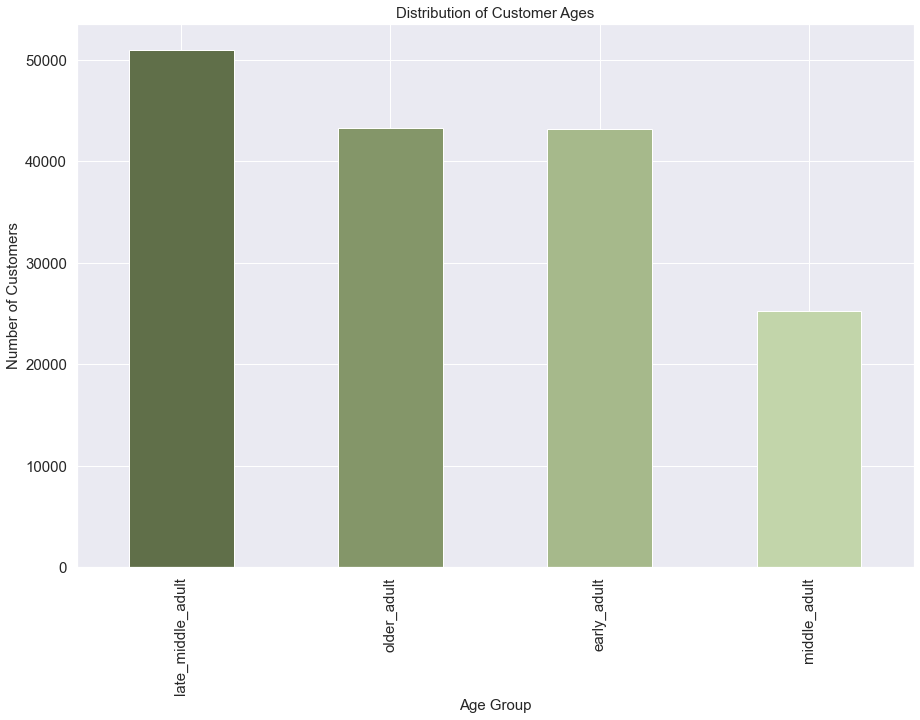

In [20]:
#setting chart size
sns.set(rc = {'figure.figsize':(15,10)})

#plotting chart showing distribution of customer ages
age_bar = df_nodup['age_group'].value_counts().plot.bar(color=['#606f49', '#849669', '#a6b98b', '#c2d5aa'], fontsize=15)
plt.title('Distribution of Customer Ages', fontsize=15)
plt.xlabel('Age Group', fontsize=15)
plt.ylabel('Number of Customers', fontsize=15)

## Income Groups Distribution Pie Chart

Text(0.5, 1.0, 'Distribution of Customer Income')

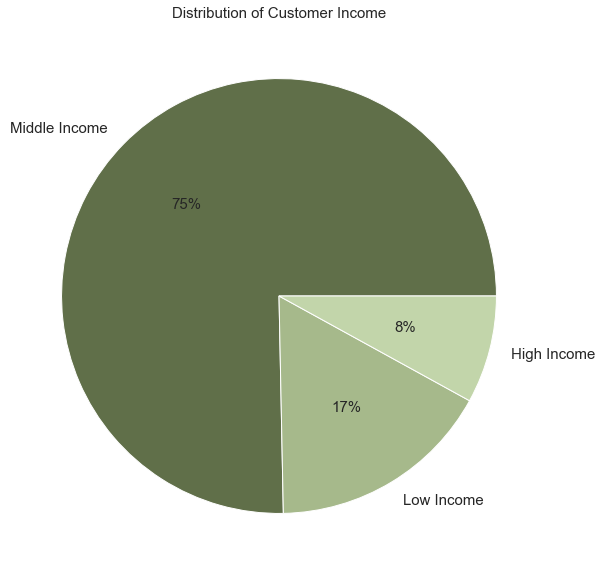

In [24]:
#setting chart size
sns.set(rc = {'figure.figsize':(15,10)})

#plotting chart showing distribution of customer ages
income_pie = df_nodup['income_group'].value_counts().plot.pie(
    label = '',
    labels=['Middle Income', 'Low Income', 'High Income'],
    autopct=('%1.f%%'),
    colors=['#606f49', '#a6b98b', '#c2d5aa'],
    fontsize=15)
plt.title('Distribution of Customer Income', fontsize=15)


## Pet Owners Distribution Pie Chart

Text(0.5, 1.0, 'Distribution of Pet Owner Customers')

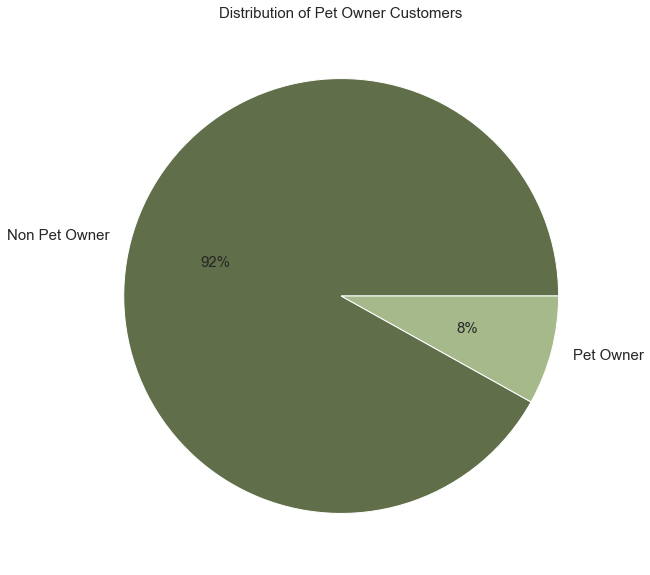

In [25]:
#setting chart size
sns.set(rc = {'figure.figsize':(15,10)})

#plotting chart showing distribution of customers who are pet owners
pet_pie = df_nodup['pet_owner_flag'].value_counts().plot.pie(
    label = '',
    labels=['Non Pet Owner', 'Pet Owner'],
    autopct=('%1.f%%'),
    colors=['#606f49', '#a6b98b', '#c2d5aa'],
    fontsize=15)
plt.title('Distribution of Pet Owner Customers', fontsize=15)


## Single Caretakers Distribution Pie Chart

Text(0.5, 1.0, 'Distribution of Single Caretakers Customers')

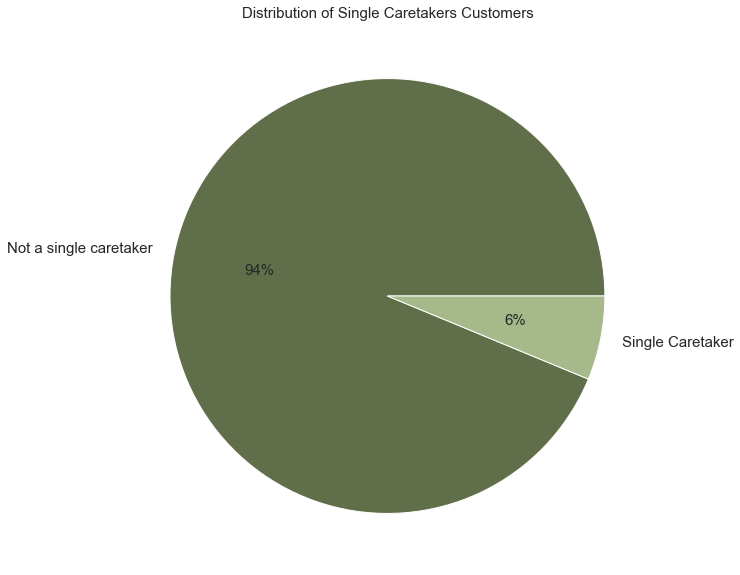

In [26]:
#setting chart size
sns.set(rc = {'figure.figsize':(15,10)})

#plotting chart showing distribution of customers who are single caretakers
single_caretakers_pie = df_nodup['single_caretaker_flag'].value_counts().plot.pie(
    label = '',
    labels=['Not a single caretaker', 'Single Caretaker'],
    autopct=('%1.f%%'),
    colors=['#606f49', '#a6b98b', '#c2d5aa'],
    fontsize=15)
plt.title('Distribution of Single Caretakers Customers', fontsize=15)


# 07. Profile Aggregations

## Age Profile

In [47]:
df_new.groupby(['age_group']).agg({'median_since_prior_order':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})

median_since_prior_order               prices           
                                      mean  min   max      mean  min   max
age_group                                                                 
early_adult                       9.960938  0.0  30.0  7.784978  1.0  25.0
late_middle_adult                 9.992188  0.0  30.0  7.789059  1.0  25.0
middle_adult                      9.921875  0.0  30.0  7.792842  1.0  25.0
older_adult                       9.929688  0.0  30.0  7.796715  1.0  25.0

## Income Profile

In [48]:
df_new.groupby(['income_group']).agg({'median_since_prior_order':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})

median_since_prior_order               prices           
                                  mean  min   max      mean  min   max
income_group                                                          
high income                   9.765625  0.0  30.0  7.936962  1.0  25.0
low income                   10.476562  0.0  30.0  6.766241  1.0  25.0
middle income                 9.898438  0.0  30.0  7.928418  1.0  25.0

## Pet Owners

In [49]:
df_new.groupby(['pet_owner_flag']).agg({'median_since_prior_order':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})

median_since_prior_order               prices           
                                   mean  min   max      mean  min   max
pet_owner_flag                                                         
non pet owner                 10.054688  0.0  30.0  7.787939  1.0  25.0
pet owner                      9.195312  0.0  30.0  7.811730  1.0  25.0

## Single Caretakers

In [21]:
df_new.groupby(['single_caretaker_flag']).agg({'median_since_prior_order':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})

median_since_prior_order               prices           
                                          mean  min   max      mean  min   max
single_caretaker_flag                                                         
no                                    9.968750  0.0  30.0  7.790278  1.0  25.0
yes                                   9.867188  0.0  30.0  7.800604  1.0  25.0

# 08. Exporting Visualizations

In [27]:
age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_bar.png'))
income_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_pie.png'))
pet_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pet_pie.png'))
single_caretakers_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'single_caretakers_pie.png'))